In [1]:
import numpy as np
import matplotlib.pyplot as plt
import phoebe
from IPython.display import display, Math
phoebe.interactive_checks_off()
phoebe.interactive_constraints_off()

In [2]:
params = {'period@binary': 0.3,
't0_supconj': 0.23,
'mass@primary': 1.21,
'mass@secondary': 0.64,
'requiv@primary': 1.092,
# 'requiv@secondary': 0.8,
'teff@primary': 6300,
'teff@secondary': 6300,
'incl@binary': 85.751,
'ecc': 0.,
'per0': 45,
'pblum': 15.024,
'l3': 0.0}

In [3]:
np.random.seed(0)
times = np.random.uniform(0.0, 25, 500)
times.sort()

In [4]:
b = phoebe.default_binary(contact_binary=True, force_build=True)
b.add_dataset('lc', times = times)
b.flip_constraint('mass@secondary', solve_for='q')
b.flip_constraint('mass@primary', solve_for='sma@binary')

<ConstraintParameter: {sma@binary@component} = (((({mass@primary@component} * ({period@binary@component} ** 2.000000)) * (1.000000 + {q@binary@component})) * 2942.206217504419328179210424423218) / 39.478418) ** (1./3) (solar units) => 3.3499999999999996 solRad>

In [5]:
for twig in params.keys():
    b[twig] = params[twig]
b.run_delayed_constraints()
b.run_checks()

<RunChecksReport 0 items: status=PASS>

In [6]:
b.add_compute('legacy', compute='legacybnd')
b.set_value_all('ld_mode*', 'lookup')
b.run_compute(compute='legacybnd')

100%|██████████| 1/1 [00:00<00:00,  1.52it/s]


<ParameterSet: 3 parameters | qualifiers: comments, times, fluxes>

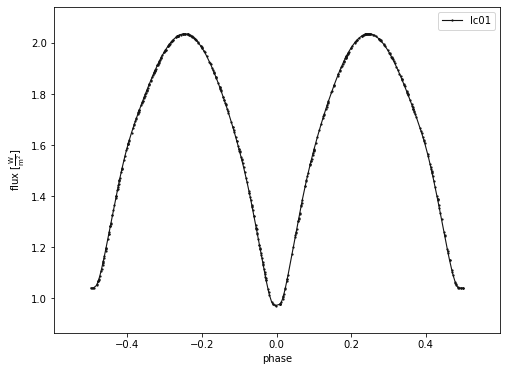

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [7]:
%matplotlib inline
b.plot(x='phase', s=0.01,  marker='.', legend=True, show=True)

In [8]:
times = b['value@times@model']
# add small gaussian noise to the fluxes
sigma = 0.001
np.random.seed(2)
fluxes = b['value@fluxes@model'] + np.random.normal(0,sigma,len(times))
sigmas = np.full_like(fluxes, sigma)
np.savetxt('data/cb.lc', np.array([times, fluxes, sigmas]).T)

In [9]:
b.save('data/cb.bundle')

'data/cb.bundle'